In [1]:
from mdagent import MDAgent

In [2]:
#todays date and time
import datetime

start = datetime.datetime.now()
date = start.strftime("%Y-%m-%d")
print("date:",date)
time = start.strftime("%H:%M:%S")
print("time:",time)

date: 2024-07-18
time: 21:29:47


In [3]:
model = "gpt-4o-2024-05-13"

mda = MDAgent(
    agent_type='Structured', 
    model=model, 
    tools_model=model,
    use_memory=False, 
    top_k_tools="all"
)

print("LLM: ", mda.llm.model_name,"\nTemperature: ", mda.llm.temperature)

LLM:  gpt-4o-2024-05-13 
Temperature:  0.1


In [4]:
prompt = '''Simulate protein 1ZNI at 300K for 1ns and calculate RMSD.'''
answer = mda.run(prompt)

Thought: To simulate the protein 1ZNI at 300K for 1ns and calculate the RMSD, I need to first download the PDB file for 1ZNI. Then, I will set up and run the simulation using the specified parameters. Finally, I will calculate the RMSD from the simulation results.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1ZNI"
}
```PDB file found with this ID: 1ZNI


2024-07-18 21:29:50.062 
  command:

    streamlit run /opt/anaconda3/envs/mda_jun15/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]


To proceed with the simulation of protein 1ZNI at 300K for 1ns, I need to set up and run the simulation using the downloaded PDB file. After the simulation, I will calculate the RMSD.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1ZNI_212950",
    "forcefield_files": [],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false,
      "solvate": false
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds"
    },
    "simulation_params": {
      "Ensemble": "NVT",
      "Number of Steps": 500000,
      "record_interval_steps": 5000,
      "record_params": ["step", "potentialEnergy", "temperature"]
    }
  }
}
```
Setting default forcefields v2
Building system...
About to create system...
Attempts at creating system: 0/3
adding system witho

In [5]:
end = datetime.datetime.now()
elapsed = end - start
print(f"duration: {elapsed.total_seconds()/60:.2f} minutes")

duration: 23.11 minutes


In [6]:
registry = mda.path_registry
all_names = registry.list_path_names()
print(all_names)

Names found in registry: 1ZNI_212950, 1ZNI_212957, top_sim0_213001, sim0_213001, rec0_213002, rec1_213002, rec2_213002, rmsd_213001, fig0_215252


In [7]:
#ensure all files are in path registry
assert all(n in all_names for n in ['1ZNI', 'rmsd', 'sim0', 'top_sim0', 'fig0']), "Not all file ids are present in path registry"

In [8]:
# let's see if we can't grab the plot
import re
import os
match = re.search(rf"fig0_\d+", all_names)
plot_path = registry.get_mapped_path(match.group(0))
assert os.path.exists(plot_path)

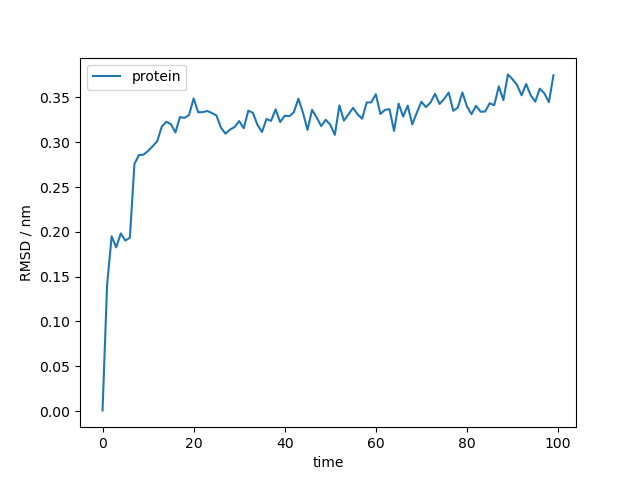

In [10]:
from IPython.display import Image
plot_path = registry.get_mapped_path('fig0_215252')
Image(filename=plot_path)

# Experiment Result:
### Completed without Exception or TimeOut Errors ✅
### Attempted all necessary steps ✅
### Logic make sense ✅
### Correct Answer  ✅
